# Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

###                                              DATA PROCESSING

Importing the nessesary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Data Processing of the QVI_purchase_behaviour.csv
Loading the QVI_purchase_behaviour.csv data set and vewing the first five rows

In [2]:
purchase = pd.read_csv("QVI_purchase_behaviour.csv")
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
purchase.shape

(72637, 3)

In [4]:
purchase.describe().T

,count,mean,std,min,25%,50%,75%,max
LYLTY_CARD_NBR,72637.0,136185.93177,89892.932014,1000.0,66202.0,134040.0,203375.0,2373711.0


In [5]:
#checking the Data type
purchase.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [6]:
#checking the unique values for the LYTY_CARD_NBR to check if its consistent with the number of rows present
#using value_counts() to count unique values and their frequencies
value_counts = purchase["LYLTY_CARD_NBR"].value_counts()
#filtering values that have a countgreater than one
filtered_counts = value_counts[value_counts>1]

print ("Unique values with counts greater than one: ")
print(filtered_counts)

print("\nTotal counts of allunique values :")
print (value_counts.sum())

#values are 72637 same as number of rows in this data.

Unique values with counts greater than one: 
Series([], Name: LYLTY_CARD_NBR, dtype: int64)

Total counts of allunique values :
72637


### Checking Missing Values and rectifying it

In [7]:
#count of missing data
Missing_values =purchase.isna().sum()
print("{} ".format(Missing_values))

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64 


##### Data Processing of the QVI_transaction_data.xlsx
Loading the QVI_transaction_data.xlsx data set and vewing the first five rows

In [8]:
transaction = pd.read_excel("QVI_transaction_data.xlsx")
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
transaction.shape

(264836, 8)

In [10]:
#Converting the date  to date formart
transaction['DATE'] = pd.to_datetime(transaction['DATE'], origin='1899-12-30', unit='D')

In [11]:
transaction.describe(include='all').T

C:\Users\josep\AppData\Local\Temp\ipykernel_4268\2251822836.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaction.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
DATE,264836,364,2018-12-24 00:00:00,939,2018-07-01,2019-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STORE_NBR,264836.0,NaN,NaN,NaN,NaT,NaT,135.08011,76.78418,1.0,70.0,130.0,203.0,272.0
LYLTY_CARD_NBR,264836.0,NaN,NaN,NaN,NaT,NaT,135549.476404,80579.978022,1000.0,70021.0,130357.5,203094.25,2373711.0
TXN_ID,264836.0,NaN,NaN,NaN,NaT,NaT,135158.310815,78133.026026,1.0,67601.5,135137.5,202701.25,2415841.0
PROD_NBR,264836.0,NaN,NaN,NaN,NaT,NaT,56.583157,32.826638,1.0,28.0,56.0,85.0,114.0
PROD_NAME,264836,114,Kettle Mozzarella Basil & Pesto 175g,3304,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROD_QTY,264836.0,NaN,NaN,NaN,NaT,NaT,1.907309,0.643654,1.0,2.0,2.0,2.0,200.0
TOT_SALES,264836.0,NaN,NaN,NaN,NaT,NaT,7.3042,3.083226,1.5,5.4,7.4,9.2,650.0


In [12]:
#cheking the data types
transaction.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

Examining the PROD_NAME COLUMN

In [13]:
Product_summary = transaction['PROD_NAME'].describe()
Product_summary

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [14]:
#Examine the words in PROD_NAME to filter out non-chip products
product_words =transaction['PROD_NAME'].str.split().explode()
product_words = product_words[~product_words.str.contains(r'[0-9&/]')]

In [15]:
#Remove salsa Products
transaction = transaction[~transaction['PROD_NAME'].str.contains('Salsa')]

### Checking Missing Values and rectifying it

In [16]:
#count of missing data
Missing_values =transaction.isna().sum()
print("{} ".format(Missing_values))

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64 


### Checking For Outliers and rectifying it

Because of luck of good domain Knowledge I Will only inspect PROD_QTY AND TOT_SALES Columns for outliers by using the box plot method to visualize the outliers

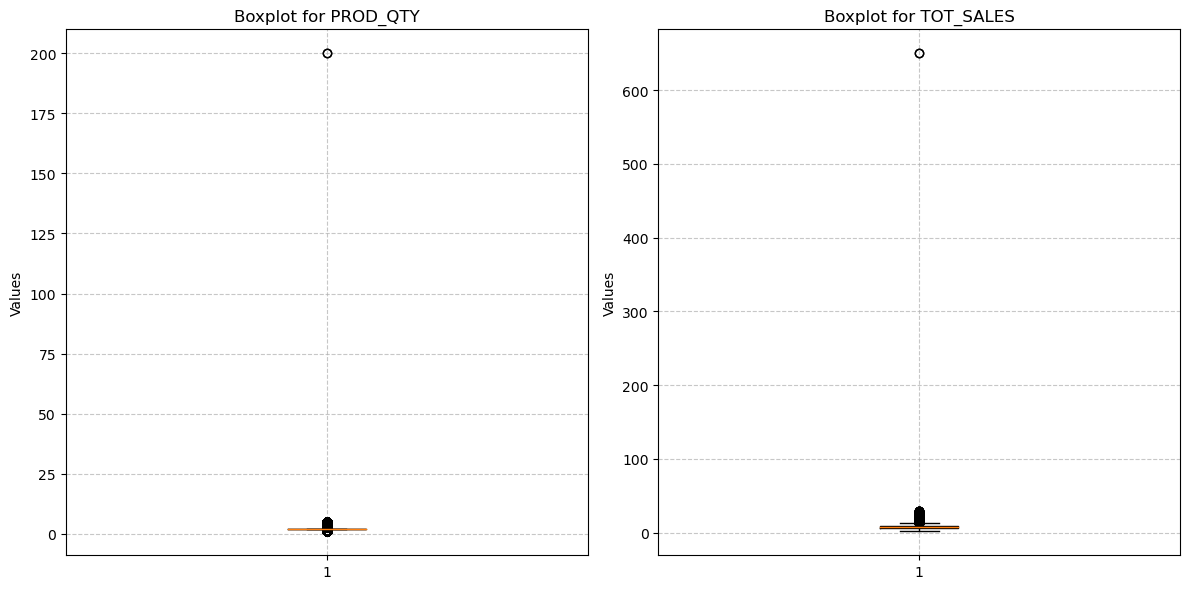

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(12,6))

#Boxplot for PROD_QTY
plt.subplot(1,2,1)
plt.boxplot(transaction['PROD_QTY'])
plt.title('Boxplot for PROD_QTY')
plt.ylabel('Values')
plt.grid(True, linestyle ='--', alpha = 0.7)

#Boxplot for TOT_SALES
plt.subplot(1,2,2)
plt.boxplot(transaction['TOT_SALES'])
plt.title('Boxplot for TOT_SALES')
plt.ylabel('Values')
plt.grid(True, linestyle ='--', alpha = 0.7)


plt.tight_layout()
plt.show()
plt.clf()

Removing the Outliers using the IQR method

In [18]:

v1 = [200]
v2 = [650]
for columns, values in zip(["PROD_QTY","TOT_SALES"],[v1, v2]):
    transaction = transaction[~transaction[columns].isin(values)]

z = np.max(transaction["PROD_NAME"])
z

'Woolworths Cheese   Rings 190g'

Checking if the outliers have been removed

In [19]:
#count of missing data
Missing_values =transaction.isna().sum()
print("{} ".format(Missing_values))

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64 


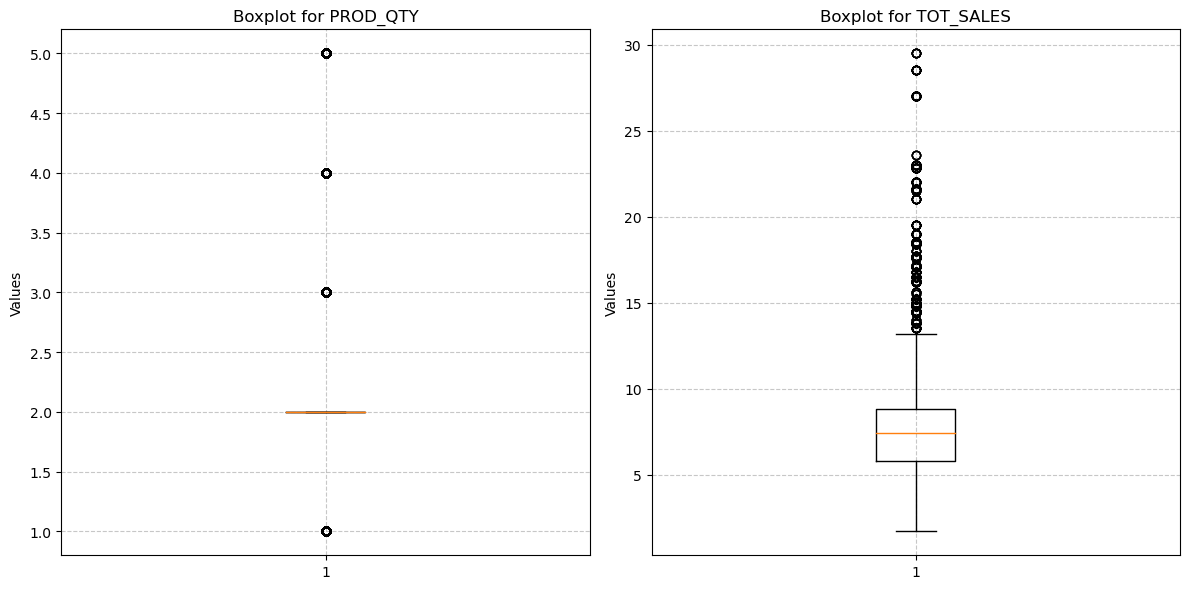

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(12,6))

#Boxplot for PROD_QTY
plt.subplot(1,2,1)
plt.boxplot(transaction['PROD_QTY'])
plt.title('Boxplot for PROD_QTY')
plt.ylabel('Values')
plt.grid(True, linestyle ='--', alpha = 0.7)

#Boxplot for TOT_SALES
plt.subplot(1,2,2)
plt.boxplot(transaction['TOT_SALES'])
plt.title('Boxplot for TOT_SALES')
plt.ylabel('Values')
plt.grid(True, linestyle ='--', alpha = 0.7)


plt.tight_layout()
plt.show()
plt.clf()

#### Check the trasactions by date

In [21]:
transactions_by_day = transaction.groupby('DATE').size().reset_index(name='N')

#### Create a sequence of dates and join it to fill missing dates

In [22]:
date_range = pd.date_range(start='2018-07-01', end = '2019-06-30')
all_dates = pd.DataFrame({'DATE':date_range})
transactions_by_day =  all_dates.merge(transactions_by_day, on ='DATE', how = 'left')
transactions_by_day['N'] = transactions_by_day['N'].fillna(0)

#### Transaction over time

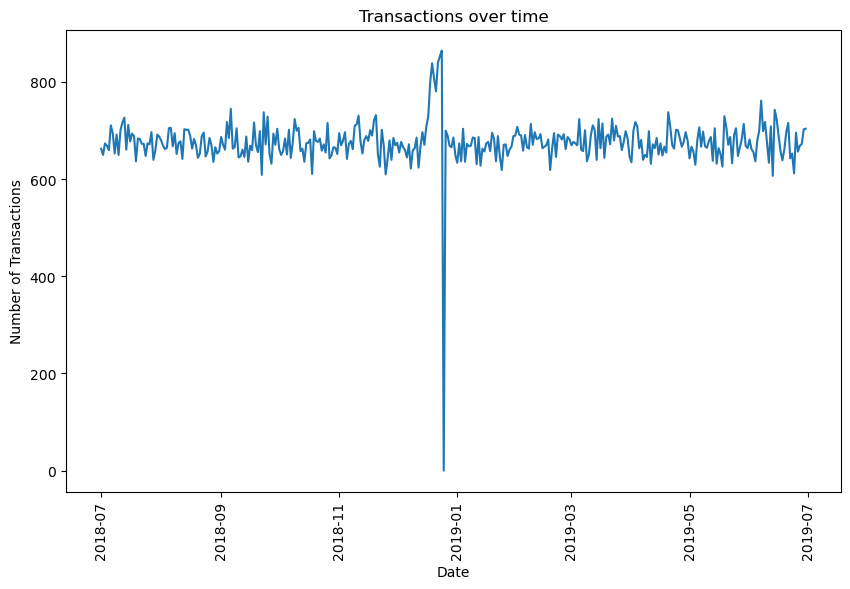

<Figure size 640x480 with 0 Axes>

In [23]:
#Plot Transactions over time
plt.figure(figsize=(10,6))
plt.plot(transactions_by_day['DATE'],transactions_by_day['N'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Transactions over time')
plt.xticks(rotation = 90)
plt.show()
plt.clf()

### Create a pack size Column

In [24]:
transaction['PACK_SIZE'] = transaction['PROD_NAME'].str.extract('(\d+)g').astype(float)
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0


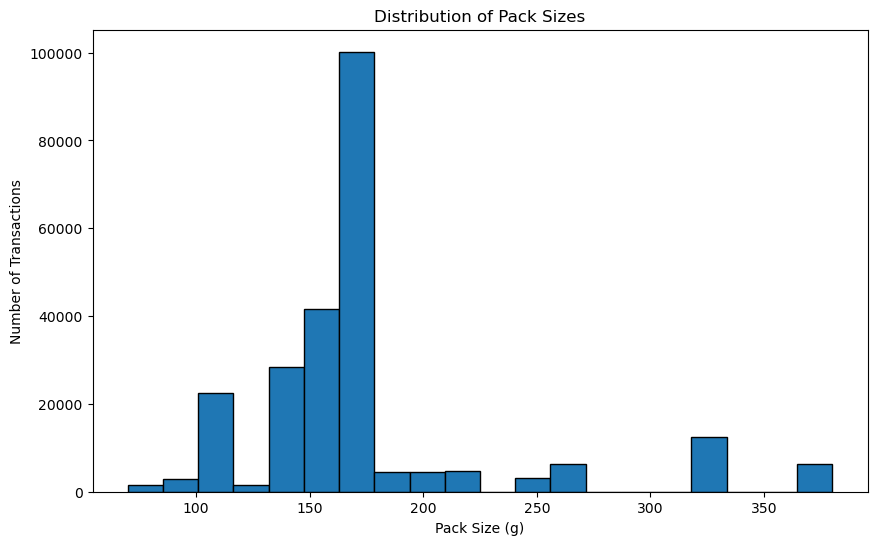

<Figure size 640x480 with 0 Axes>

In [25]:
#Plot a Histogram of Pack Size
plt.figure(figsize=(10, 6))
plt.hist(transaction['PACK_SIZE'], bins=20, edgecolor='k')
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Pack Sizes')
plt.show()
plt.clf()

### Create a Brand Column

In [26]:
transaction['BRAND'] = transaction['PROD_NAME'].str.split().str[0]

In [27]:

# Clean Brand names
transaction['BRAND'] = transaction['BRAND'].replace('RRD','Red Rock Deli')

In [28]:
Missing_values =transaction.isna().sum()
print("{} ".format(Missing_values))

DATE                 0
STORE_NBR            0
LYLTY_CARD_NBR       0
TXN_ID               0
PROD_NBR             0
PROD_NAME            0
PROD_QTY             0
TOT_SALES            0
PACK_SIZE         6064
BRAND                0
dtype: int64 


if the missing values constitute of less than 10% we drop the rows if more than 10% we fill them with zero

In [29]:
percentage=  transaction['PACK_SIZE'].isna().sum() / transaction['BRAND'].count() *100
print("{}%".format(round(percentage,2)))

2.46%


In [30]:
transaction = transaction.dropna()

In [31]:
transaction.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PACK_SIZE         0
BRAND             0
dtype: int64

# MERGING the TWO data Purchase and Transaction data to data

In [32]:
data = pd.merge(purchase,transaction, on = "LYLTY_CARD_NBR", how = 'left')
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175.0,Natural
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1.0,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,150.0,Red
2,1003,YOUNG FAMILIES,Budget,2019-03-08,1.0,4.0,106.0,Natural ChipCo Hony Soy Chckn175g,1.0,3.0,175.0,Natural
3,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1.0,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,160.0,WW
4,1005,MIDAGE SINGLES/COUPLES,Mainstream,2018-12-28,1.0,6.0,86.0,Cheetos Puffs 165g,1.0,2.8,165.0,Cheetos


In [33]:
data.shape

(242486, 12)

In [34]:
#count of missing data
Missing_values =data.isna().sum()
print("{}".format(Missing_values))

LYLTY_CARD_NBR         0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
DATE                1810
STORE_NBR           1810
TXN_ID              1810
PROD_NBR            1810
PROD_NAME           1810
PROD_QTY            1810
TOT_SALES           1810
PACK_SIZE           1810
BRAND               1810
dtype: int64


In [35]:
percentage=  data['PACK_SIZE'].isna().sum() / data['BRAND'].count() *100
print("{}%".format(round(percentage,2)))

0.75%


In [36]:
#count of missing data
data = data.dropna()


In [37]:
Missing_values =data.isna().sum()
print("{}".format(Missing_values))


LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
dtype: int64


In [38]:
data.shape

(240676, 12)

In [39]:
data.describe(include='all').T

C:\Users\josep\AppData\Local\Temp\ipykernel_4268\3536075253.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
LYLTY_CARD_NBR,240676.0,NaN,NaN,NaN,NaT,NaT,135575.998637,80813.089071,1000.0,70019.0,130388.0,203096.0,2373711.0
LIFESTAGE,240676,7,OLDER SINGLES/COUPLES,49547,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PREMIUM_CUSTOMER,240676,3,Mainstream,92729,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DATE,240676,364,2018-12-24 00:00:00,847,2018-07-01,2019-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STORE_NBR,240676.0,NaN,NaN,NaN,NaT,NaT,135.087599,76.788631,1.0,70.0,130.0,203.0,272.0
TXN_ID,240676.0,NaN,NaN,NaN,NaT,NaT,135170.441124,78153.577212,1.0,67590.75,135279.5,202705.25,2415841.0
PROD_NBR,240676.0,NaN,NaN,NaN,NaT,NaT,56.577822,34.073046,1.0,26.0,55.0,87.0,114.0
PROD_NAME,240676,102,Kettle Mozzarella Basil & Pesto 175g,3304,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROD_QTY,240676.0,NaN,NaN,NaN,NaT,NaT,1.906501,0.342453,1.0,2.0,2.0,2.0,5.0
TOT_SALES,240676.0,NaN,NaN,NaN,NaT,NaT,7.345252,2.48981,1.7,5.8,7.4,8.8,29.5


# DATA ANALYSIS

### Metrics
1 - Total sales.

2 - some of the top product names with PROD_QTY = 5.0.

3 - Top and Bottom 10 products and the life stages.

4 - Top and Bottom 10 Products by the premium customers.

5 - Top and Bottom 10 stores by PROD_QTY by TOT_SALES.

6 - Total Sales by Customer segment (LIFESTAGE and PREMIUM_CUSTOMER) - here we want to find out which customers spend the most on chips.

7 - Number of Customers in each Segment - here we're intrested in knowing how many customers are in each of this customer groups.

8 - Average Number of Chips Bought per Customer by Segment - we are looking at how many chips, on average, each customerin this segmenst buys.

9 - Average chip price by Customer Segment -  this metrics helps us understand the average price at which chips are sold to customers in different segments.

10 - Statistical Test for Price Differences - we perform a test to check if there's a significant difference in average chip prices between specific 
customer groups.

11 - Deep Dive into Mainstream,Young singles/Couples -  we focus on a specific customer segment, "Mainstream, Young singles/couples," to gain deeper insights.

12 - Analyze preferred Pack Sizes

### 1 - Total sales

In [40]:
# Total sales
total_sales = np.sum(data['TOT_SALES'])
print ("The total sales is: {}".format(round(total_sales, 1)))
max_sales = max(data['TOT_SALES'])
print ("The highest sale is: {}".format(round(max_sales, 0)))
min_sales =min(data['TOT_SALES'])
print ("The lowest sale is: {}".format(round(min_sales, 0)))

The total sales is: 1767825.9
The highest sale is: 30.0
The lowest sale is: 2.0


### 2 - Products (PROD_NAME) that have a quantity of 5.0 (PROD_QTY)


In [41]:
filterd_values = data[data['PROD_QTY'] == 5.0]['PROD_NAME']
filterd_value =filterd_values.count()
print ('Count of all products with PROD_QTY 5.0: {}'.format(filterd_value))
print('list of five of the products')
filterd_values.head()

Count of all products with PROD_QTY 5.0: 405
list of five of the products


891       Smiths Chip Thinly  S/Cream&Onion 175g
1067            Thins Chips Salt &  Vinegar 175g
1103            Pringles Sthrn FriedChicken 134g
1270       Grain Waves         Sweet Chilli 210g
1637    Kettle Sensations   Camembert & Fig 150g
Name: PROD_NAME, dtype: object

### 3 - Top 10  and Bottom 10 products and the life stages

In [42]:
top_five = data.nlargest(10, 'TOT_SALES')[['PROD_NAME','LIFESTAGE','TOT_SALES']].rename(columns={
    'PROD_NAME': 'Product',
    'LIFESTAGE':'Life Stage',
    'TOT_SALES': 'Total Sales'
}).reset_index(drop=True)
top_five.index += 1
print ("The Top 10 products")
top_five

The Top 10 products


,Product,Life Stage,Total Sales
1,Smiths Crnkle Chip Orgnl Big Bag 380g,RETIREES,29.5
2,Smiths Crnkle Chip Orgnl Big Bag 380g,YOUNG FAMILIES,29.5
3,Smiths Crnkle Chip Orgnl Big Bag 380g,OLDER FAMILIES,29.5
4,Smiths Crnkle Chip Orgnl Big Bag 380g,MIDAGE SINGLES/COUPLES,29.5
5,Smiths Crnkle Chip Orgnl Big Bag 380g,RETIREES,29.5
6,Smiths Crnkle Chip Orgnl Big Bag 380g,OLDER FAMILIES,29.5
7,Smiths Crnkle Chip Orgnl Big Bag 380g,OLDER SINGLES/COUPLES,29.5
8,Cheezels Cheese 330g,OLDER FAMILIES,28.5
9,Smiths Crinkle Original 330g,MIDAGE SINGLES/COUPLES,28.5
10,Smiths Crinkle Chips Salt & Vinegar 330g,RETIREES,28.5


In [43]:
bottom_five = data.nsmallest(10, 'TOT_SALES')[['PROD_NAME','LIFESTAGE','TOT_SALES']].rename(columns={
    'PROD_NAME': 'Product',
    'LIFESTAGE':'Life Stage',
    'TOT_SALES': 'Total Sales'
}).reset_index(drop=True)

print ("The bottom 10 products")
bottom_five

The bottom 10 products


,Product,Life Stage,Total Sales
0,WW Crinkle Cut Chicken 175g,YOUNG FAMILIES,1.7
1,Sunbites Whlegrn Crisps Frch/Onin 90g,OLDER SINGLES/COUPLES,1.7
2,Sunbites Whlegrn Crisps Frch/Onin 90g,YOUNG SINGLES/COUPLES,1.7
3,Sunbites Whlegrn Crisps Frch/Onin 90g,NEW FAMILIES,1.7
4,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,RETIREES,1.7
5,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,NEW FAMILIES,1.7
6,WW Crinkle Cut Original 175g,NEW FAMILIES,1.7
7,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,OLDER SINGLES/COUPLES,1.7
8,Sunbites Whlegrn Crisps Frch/Onin 90g,YOUNG SINGLES/COUPLES,1.7
9,WW Crinkle Cut Original 175g,YOUNG SINGLES/COUPLES,1.7


### 4 - Top 10 and Bottom 10 PRODUCTS TAKEN BY THE PREMIUMS

In [44]:

#The Top 10 Products

unique_premium = data['PREMIUM_CUSTOMER'].unique()

count_dict ={}
for premium_value in unique_premium:
    filtered_df = data[data['PREMIUM_CUSTOMER'] == premium_value]
    count = filtered_df['PROD_NAME'].unique()
    count_dict[premium_value] = count



top_10_values = pd.DataFrame(count_dict[max(count_dict, key = lambda k : len(count_dict[k]))][:10]).reset_index(drop=True)
top_10_values.index += 1
top_10_values
print ('The Top 10 Products')
top_10_values

The Top 10 Products


,0
1,Natural Chip Compny SeaSalt175g
2,Doritos Cheese Supreme 330g
3,GrnWves Plus Btroot & Chilli Jam 180g
4,RRD Sweet Chilli & Sour Cream 165g
5,CCs Tasty Cheese 175g
6,Infuzions Mango Chutny Papadums 70g
7,Smiths Crinkle Chips Salt & Vinegar 330g
8,Cobs Popd Sea Salt Chips 110g
9,Natural ChipCo Sea Salt & Vinegr 175g
10,Burger Rings 220g


In [45]:
#the Bottom 10 Products
unique_premium = data['PREMIUM_CUSTOMER'].unique()

count_dict ={}
for premium_value in unique_premium:
    filtered_df = data[data['PREMIUM_CUSTOMER'] == premium_value]
    count = filtered_df['PROD_NAME'].unique()
    count_dict[premium_value] = count



botto_10_values = pd.DataFrame(count_dict[min(count_dict, key = lambda k : len(count_dict[k]))][:10]).reset_index(drop=True)
botto_10_values.index += 1
botto_10_values

print ('The Top 10 Products')
botto_10_values

The Top 10 Products


,0
1,Natural Chip Compny SeaSalt175g
2,Doritos Cheese Supreme 330g
3,GrnWves Plus Btroot & Chilli Jam 180g
4,RRD Sweet Chilli & Sour Cream 165g
5,CCs Tasty Cheese 175g
6,Infuzions Mango Chutny Papadums 70g
7,Smiths Crinkle Chips Salt & Vinegar 330g
8,Cobs Popd Sea Salt Chips 110g
9,Natural ChipCo Sea Salt & Vinegr 175g
10,Burger Rings 220g


### 5 - Top 10 and Bottom 10 stores with PROD_QTY 5.0 by TOT_SALES

In [46]:
#Top 10 stores
#FILTERING BY PROD_QTY
filterd_df = data[data['PROD_QTY'] == 5.0]
#SORT BY TOT_SALES IN DESECNDING ORDER AND GET TOP 10 ROWS
top_10_sales = filterd_df.sort_values(by = 'TOT_SALES',ascending=False).head(10)
#rename columns
top_10_sales = top_10_sales[['STORE_NBR','PROD_QTY','TOT_SALES']].rename(columns={'STORE_NBR':'Store number','PROD_QTY':'Product Quality','TOT_SALES':'Total Sales'}).reset_index(drop=True)
top_10_sales.index +=1
top_10_sales
print('The Top 10 Stores')
top_10_sales

The Top 10 Stores


,Store number,Product Quality,Total Sales
1,194.0,5.0,29.5
2,190.0,5.0,29.5
3,24.0,5.0,29.5
4,94.0,5.0,29.5
5,44.0,5.0,29.5
6,49.0,5.0,29.5
7,118.0,5.0,29.5
8,154.0,5.0,28.5
9,96.0,5.0,28.5
10,181.0,5.0,28.5


In [47]:
#The Bottom 10
#FILTERING BY PROD_QTY
filterd_df = data[data['PROD_QTY'] == 1.0]
#SORT BY TOT_SALES IN DESECNDING ORDER AND GET TOP 10 ROWS
bottom_10_sales = filterd_df.sort_values(by = 'TOT_SALES',ascending=True).head(10)
#rename columns
bottom_10_sales = bottom_10_sales[['STORE_NBR','PROD_QTY','TOT_SALES']].rename(columns={'STORE_NBR':'Store number','PROD_QTY':'Product Quality','TOT_SALES':'Total Sales'}).reset_index(drop=True)
bottom_10_sales.index +=1
bottom_10_sales

print('The Bottom 10 Stores')
bottom_10_sales

The Bottom 10 Stores


,Store number,Product Quality,Total Sales
1,214.0,1.0,1.7
2,38.0,1.0,1.7
3,98.0,1.0,1.7
4,110.0,1.0,1.7
5,233.0,1.0,1.7
6,98.0,1.0,1.7
7,262.0,1.0,1.7
8,51.0,1.0,1.7
9,70.0,1.0,1.7
10,50.0,1.0,1.7


### 6 - Total Sales by Customer segment (LIFESTAGE and PREMIUM_CUSTOMER)

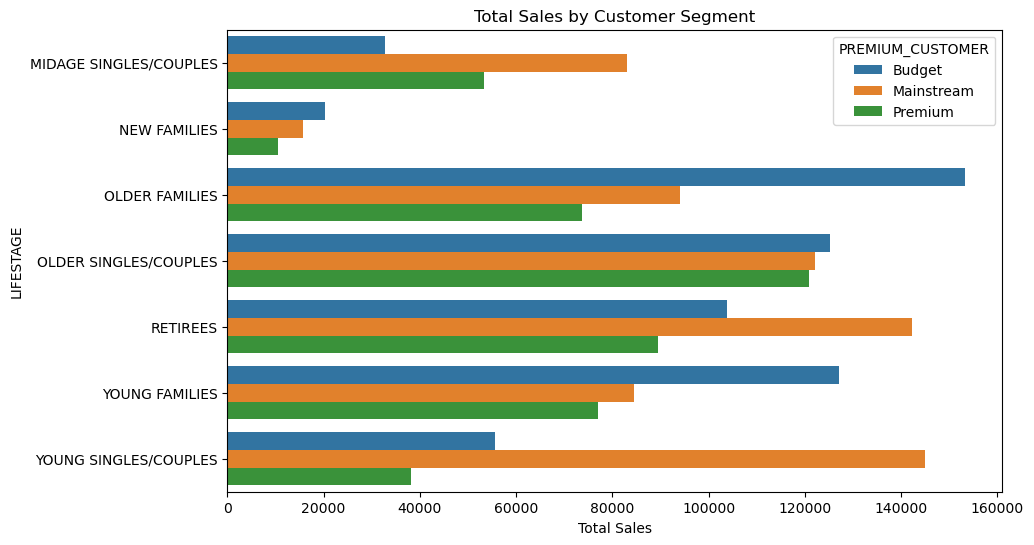

<Figure size 640x480 with 0 Axes>

In [48]:
#Calculate the total sales by customers
sales_by_segment = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

#create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_segment, x = 'TOT_SALES', y = 'LIFESTAGE', hue = 'PREMIUM_CUSTOMER')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Total Sales')
plt.ylabel('LIFESTAGE')
#adding data label
#for p in ax.patches:
  #  width = p.get_width()
   # plt.annotate(f'{width:.1f}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.show()
plt.clf()

### 7 - Number of Customers in each Segment

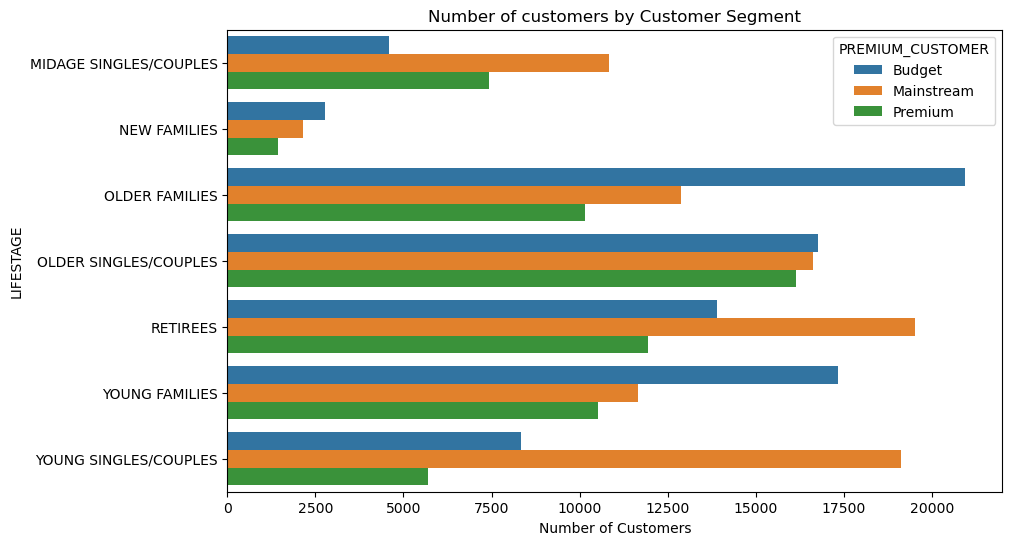

<Figure size 640x480 with 0 Axes>

In [49]:
#calculate the number of customer in each segment
customer_count_segment = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count().reset_index()

#create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=customer_count_segment, x = 'LYLTY_CARD_NBR', y = 'LIFESTAGE', hue = 'PREMIUM_CUSTOMER')
plt.title('Number of customers by Customer Segment')
plt.xlabel('Number of Customers')
plt.ylabel('LIFESTAGE')
plt.show()
plt.clf()

### 8 - Average Number of Chips Bought per Customer by Segment

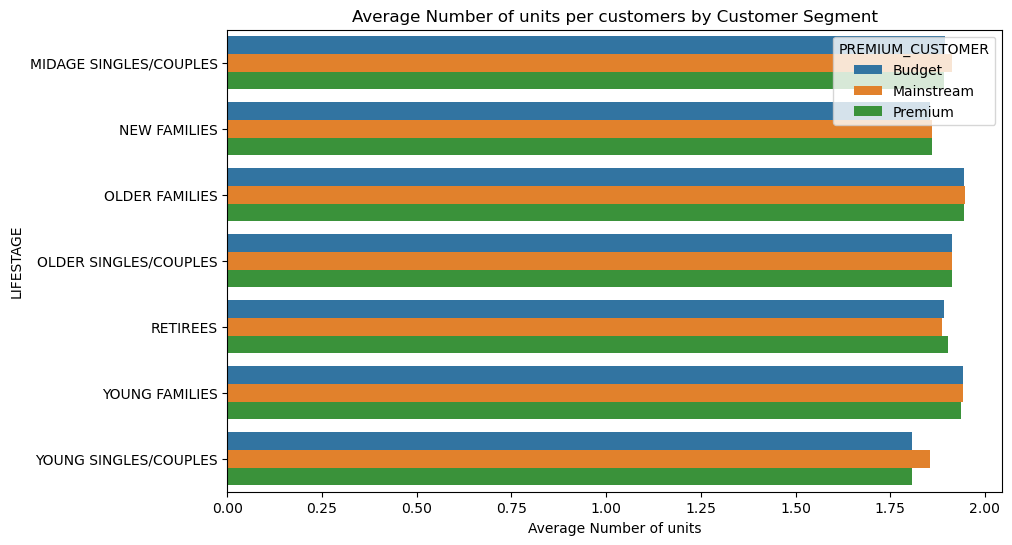

<Figure size 640x480 with 0 Axes>

In [50]:
#Calculate the average number of units(chips) bought per customer for each segment
average_units_segment = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

#Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=average_units_segment, x = 'PROD_QTY', y = 'LIFESTAGE', hue = 'PREMIUM_CUSTOMER')
plt.title('Average Number of units per customers by Customer Segment')
plt.xlabel('Average Number of units')
plt.ylabel('LIFESTAGE')

plt.show()
plt.clf()

### 9 - Average chip price by Customer Segment

In [51]:
data['PRICE_PER_UNIT'] = data['TOT_SALES'] / data['PROD_QTY']
average_price = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PRICE_PER_UNIT'].mean().reset_index()

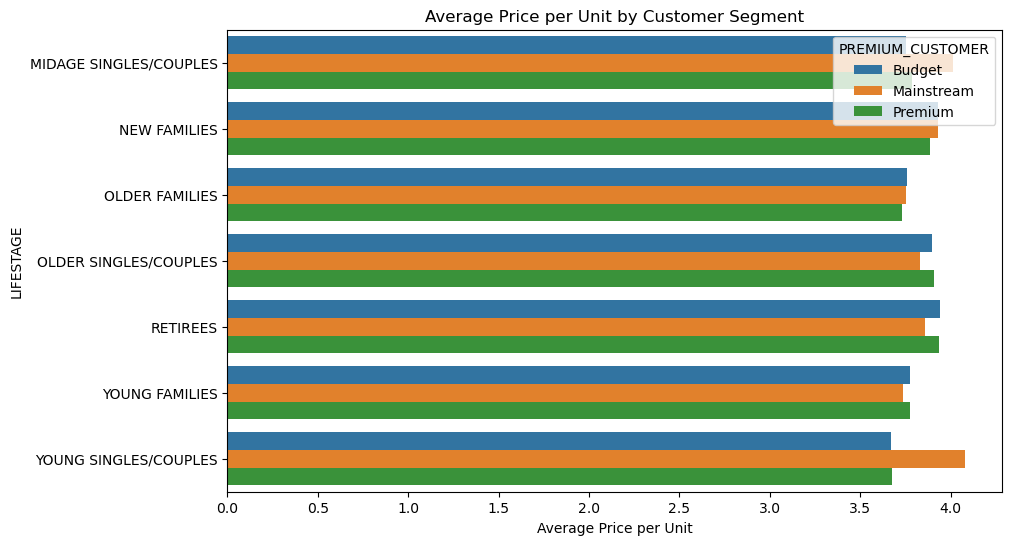

In [52]:
#average price per unit customer
plt.figure(figsize=(10, 6))
sns.barplot(data=average_price, x='PRICE_PER_UNIT', y='LIFESTAGE', hue='PREMIUM_CUSTOMER')
plt.title('Average Price per Unit by Customer Segment')
plt.xlabel('Average Price per Unit')
plt.ylabel('LIFESTAGE')


plt.show()

### 10 - Performing an Indipendent T-test Between Mainstream vs Premimum and budget mid-age and young singles and couples

In [53]:
from scipy.stats import ttest_ind

#create mask for differnt customer segments
mainstream_mask = (data['PREMIUM_CUSTOMER'] == 'Mainstream')
budget_premium = (data['PREMIUM_CUSTOMER'] != 'Mainstream')
mid_age_young_mask = (data['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES']))


In [54]:
#Calculate t-test for average price per unit
t_stat, p_value = ttest_ind(data[mainstream_mask & mid_age_young_mask]['PRICE_PER_UNIT'],
                            data[budget_premium & mid_age_young_mask]['PRICE_PER_UNIT'],
                            equal_var = False)

In [55]:
print ('this is the T statistics')
print(t_stat)
print("this is the P_value: " , p_value)

this is the T statistics
37.413441360485066
this is the P_value:  2.005532452397739e-302


### 11 - Deep Dive into the mainstream, Young singles/couples for brand and pack size analysis

In [56]:
mainstream_young = data[(data['PREMIUM_CUSTOMER'] == 'Mainstream') & (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]

In [57]:
# Analyze Preferred brands
brand_preferences = mainstream_young['BRAND'].value_counts()

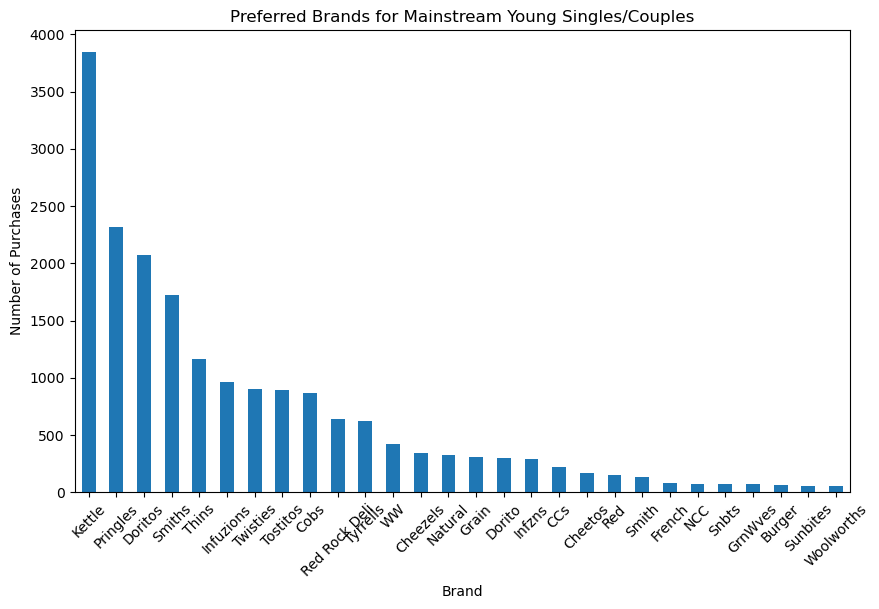

In [58]:
#Ploting The prefeered brands
plt.figure(figsize=(10, 6))
brand_preferences.plot(kind='bar')
plt.title('Preferred Brands for Mainstream Young Singles/Couples')
plt.xlabel('Brand')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

### 12 - Analyze preferred Pack Sizes

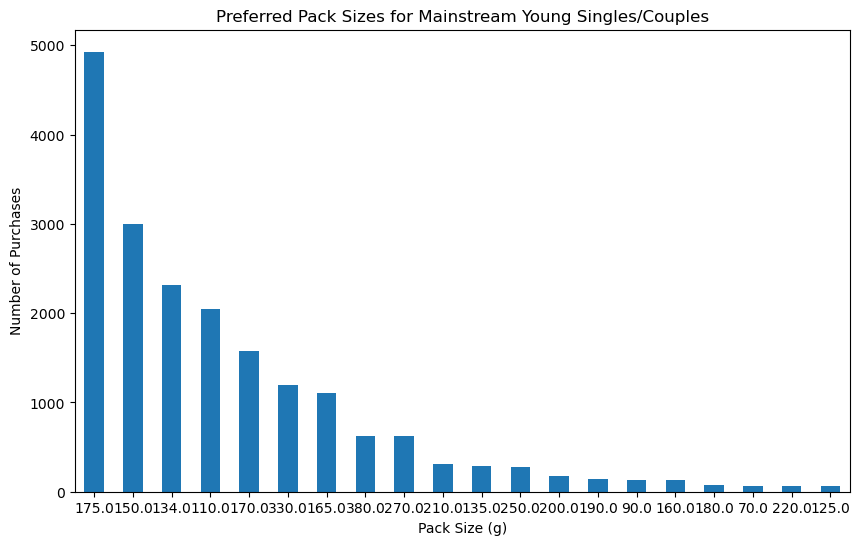

In [59]:
pack_size = mainstream_young['PACK_SIZE'].value_counts()

#Plot Preferred Pack sizes
plt.figure(figsize=(10, 6))
pack_size.plot(kind='bar')
plt.title('Preferred Pack Sizes for Mainstream Young Singles/Couples')
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.show()

# Now lets export the data we have been using to use it on task Two

In [61]:
data.to_csv("Task Tow/task_two_data.csv", encoding= 'utf-8')